## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

## Import Data

In [ ]:
# Data Import
df = pd.read_csv('/content/drive/MyDrive/data/stock_data.csv')

In [ ]:
df

,S.no,Symbol,Date,Open,High,Low,Close,Vol
0,0,ACEDBL,2012-01-01,114.0,113.0,112.0,113.0,"1,962"
1,1,ACEDPO,2012-01-01,188.0,114.0,114.0,114.0,"10,000"
2,2,ADBL,2012-01-01,115.0,115.0,113.0,114.0,"1,111"
3,3,AHPC,2012-01-01,319.0,319.0,312.0,312.0,377
4,4,ALDBL,2012-01-01,102.0,101.0,101.0,101.0,30
...,...,...,...,...,...,...,...,...
250896,117,TRH,2020-03-22,206.0,206.0,202.0,206.0,"1,575"
250897,118,UIC,2020-03-22,313.0,313.0,301.0,307.0,636
250898,119,UMHL,2020-03-22,100.0,100.0,100.0,100.0,519
250899,120,UPCL,2020-03-22,73.0,73.0,73.0,73.0,10


In [ ]:
pd.pivot_table(df, index='Symbol', values='Close', aggfunc=len)

,Close
Symbol,
ACEDBL,802.0
ACEDPO,7.0
ADBL,1911.0
AFL,47.0
AHPC,1879.0
...,...
WOMI,712.0
YETI,634.0
YETIPO,20.0


## Data Cleaning

In [ ]:
# Drop insignificant columns 
df.drop(['S.no', 'Vol'], axis=1, inplace=True)

In [ ]:
# Exclude data less than Jan 1st, 2012
df = df[df['Date'] >= '2012-01-01']

In [ ]:
# Drop rows with null values
df.dropna(inplace=True)

In [ ]:
# Convert Date column from String to Date type
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

## Data Understanding and Preparation

In [ ]:
# Group distinct tickers and count total signals of each ticker.
# Display Top 10 frequently traded tickers.
df_Top10Tickers = pd.pivot_table(df, index='Symbol', values='Close', aggfunc=len).sort_values(by='Close', ascending=False).head(10)
df_Top10Tickers

,Close
Symbol,
EBL,1917.0
SCB,1916.0
CHCL,1916.0
NIB,1913.0
PCBL,1913.0
CZBIL,1912.0
ADBL,1911.0
SRBL,1910.0
NABIL,1910.0


In [ ]:
df_stock = {}
for ticker in df_Top10Tickers.index:
  df_stock[ticker] = df[df['Symbol'] == ticker].drop('Symbol', axis=1)

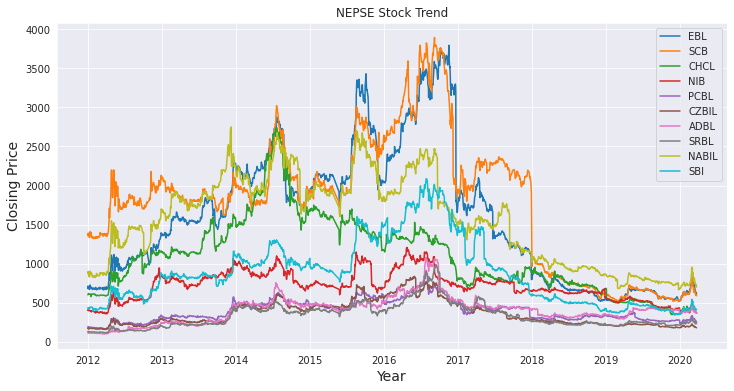

In [ ]:
# NEPSE stock  trend of all tickers in a same plot
plt.figure(figsize=(12,6))
for ticker in df_stock:
  df_ticker = df_stock[ticker]
  plt.plot(df_ticker.Date, df_ticker.Close, label=f'{ticker}')
plt.title('NEPSE Stock Trend')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend()
plt.show()

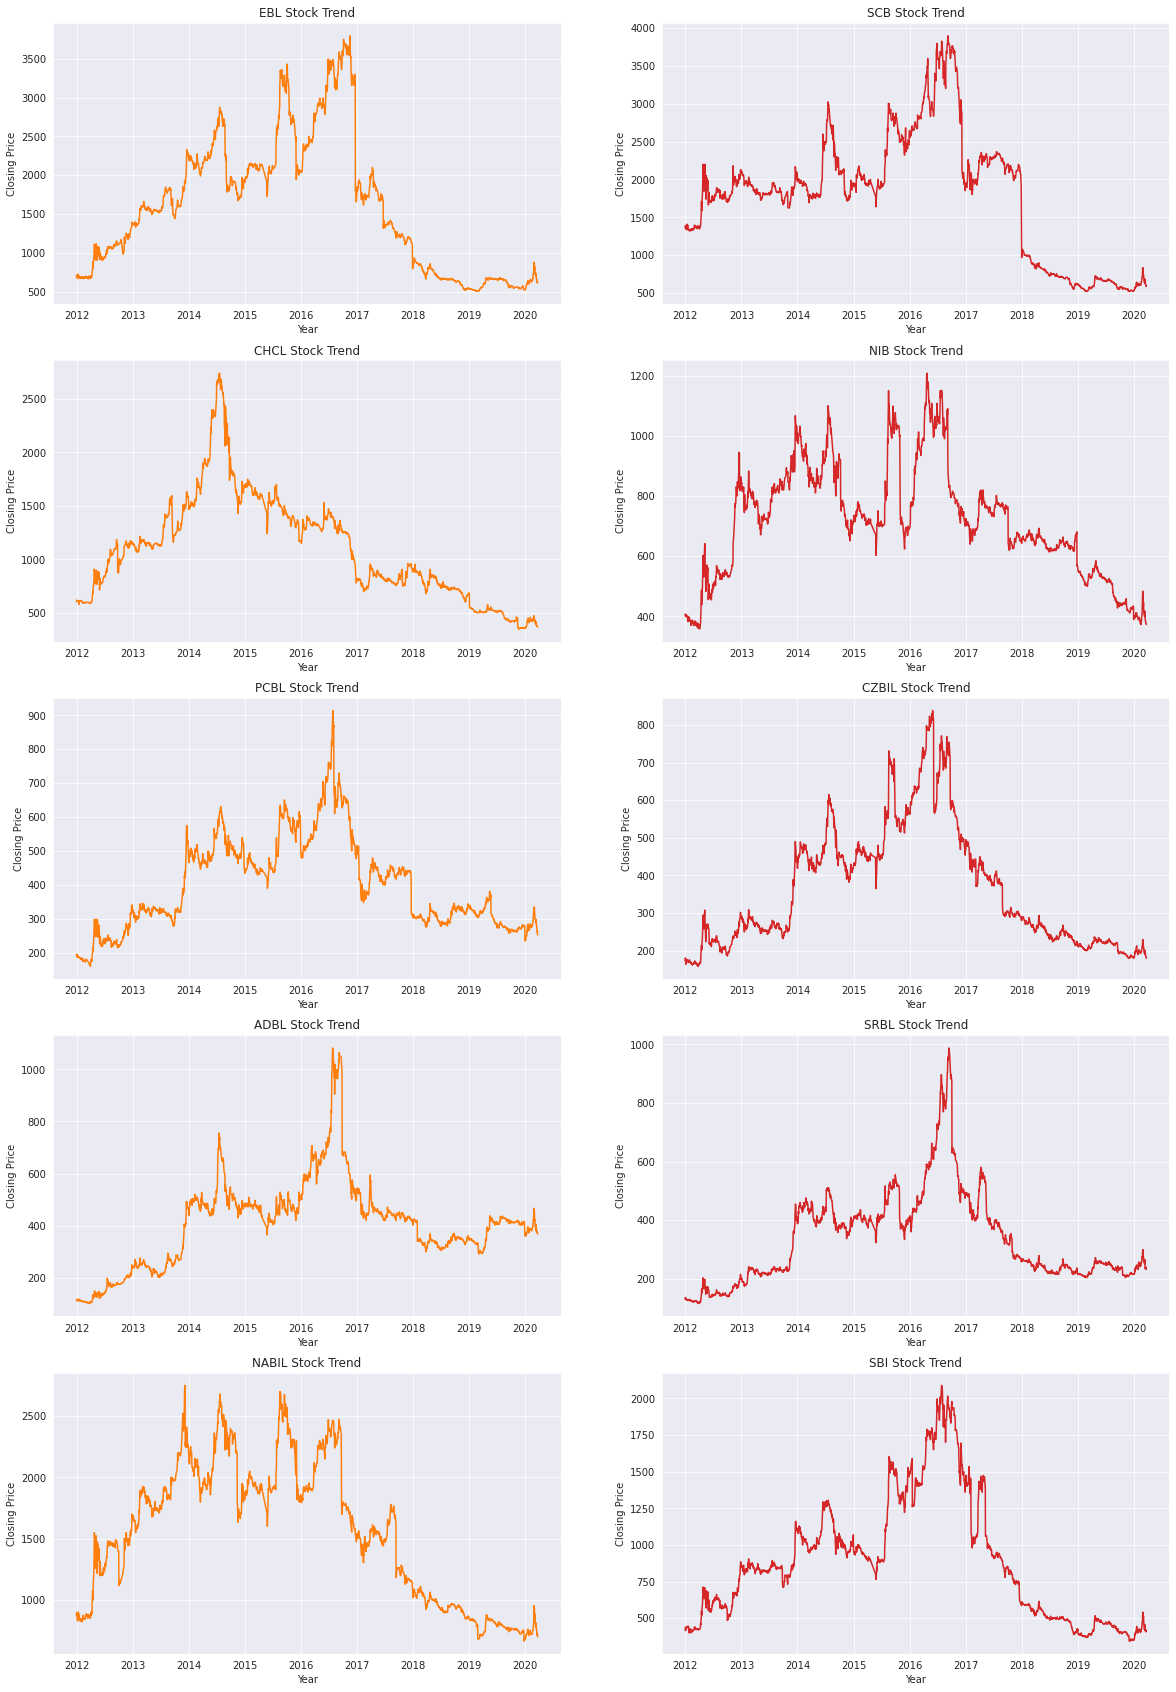

In [ ]:
# Stock Trend visualization of individual tickers
fig, axs = plt.subplots(5, 2, figsize=(20,30))
counter = 0
for i in range(len(df_Top10Tickers.index)//2):
  for j in range(2):
    if j == 0:
      color = 'orange'
    else:
      color = 'red'
    ticker = df_Top10Tickers.index[counter]
    axs[i, j].plot(df_stock[ticker]['Date'], df_stock[ticker]['Close'], f'tab:{color}')
    axs[i, j].set_title(f'{ticker} Stock Trend')
    counter+=1

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Closing Price')


In [ ]:
# Average returns of individual tickers over the years
df_avg_stock_returns = {}
for ticker in df_stock:
  df_avg_stock_returns[ticker] = (df_stock[ticker].Close.pct_change() * 100).mean()
df_avg_stock_returns

{'ADBL': 0.09476244967719016,
 'CHCL': 0.0004447407747326407,
 'CZBIL': 0.031137075954316824,
 'EBL': 0.027805842554793188,
 'NABIL': 0.01564970186241801,
 'NIB': 0.020970431795409195,
 'PCBL': 0.044723533540874195,
 'SBI': 0.029771719379631172,
 'SCB': -0.008406578465089133,
 'SRBL': 0.06419601965209884}

In [ ]:
high_returns_ticker = max(df_avg_stock_returns, key=df_avg_stock_returns.get)

In [ ]:
# Every Ticker has significant increase in the closing price from the year 2016 to 2017 and gradually decrease in the stock price.
# However, the average returns of individual tickers over the five years period is negative and only ADBL is positive. ADBL seems suitable for further analysis.

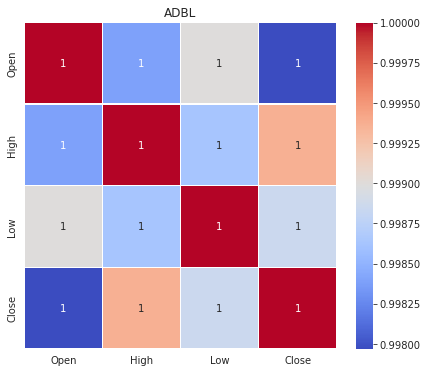

In [ ]:
# Correlation Analysis of High returns Ticker

fig, ax = plt.subplots(figsize=(7, 6))
ax.set_title(high_returns_ticker)
sns.heatmap(df_stock[high_returns_ticker].corr(), annot=True, cmap='coolwarm', linecolor='white', linewidths=.5)
plt.show()


In [ ]:
# From correlation analysis it seems every variables are significant for further analysis.
df_high_returns_ticker = df_stock[high_returns_ticker]
df_high_returns_ticker.shape

(1911, 5)

In [ ]:
# Reset index
df_high_returns_ticker.reset_index(drop=True, inplace=True)
df_high_returns_ticker.head()

,Date,Open,High,Low,Close
0,2012-01-01,115.0,115.0,113.0,114.0
1,2012-01-02,114.0,118.0,115.0,118.0
2,2012-01-03,118.0,116.0,114.0,115.0
3,2012-01-04,115.0,115.0,113.0,114.0
4,2012-01-05,114.0,114.0,112.0,113.0


## Export Data

In [ ]:
# Export all stock data into individual stock ticker csv files
for ticker in df_stock:
    df_stock[ticker].to_csv(f'/content/drive/MyDrive/data/{ticker}_data.csv', index=False)